## Testing out convolution
- Can the mean/SD simply be combined in some way for the OP and NPL data?

In [451]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [475]:
## make 2 normal distributions

input_op_mean = 0.01
input_op_sd = 0.8
input_op_points = 10000
input_npl_mean = 0.1
input_npl_sd = 0.4
input_npl_points = 1000

op = np.random.normal(loc=input_op_mean,scale=input_op_sd,size=input_op_points)
npl = np.random.normal(loc=input_npl_mean,scale=input_npl_sd,size=input_npl_points)
norms = [op,npl]
labels = ['op','npl']

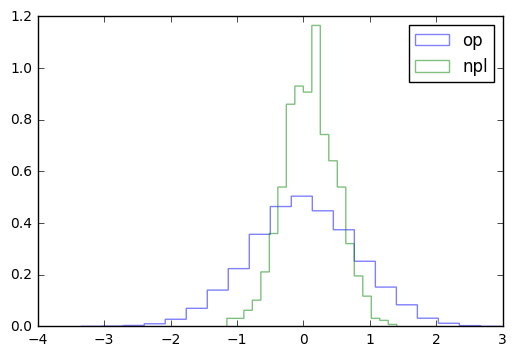

In [476]:
## show both sets of data on a plot
i=0
ns=[]
bins=[]
patches=[]
for norm in norms:
    n,bin,patches=plt.hist(norm,bins=20,alpha=0.5,histtype='step',label=labels[i], normed=True)
    ns.append(list(n))
    bins.append(list(bin)[0:-1]) # take only left hand bin edges
    patches.append(list(patches))
    i=i+1
#plt.xlim(-10,10)
plt.legend(loc='best')
plt.show()

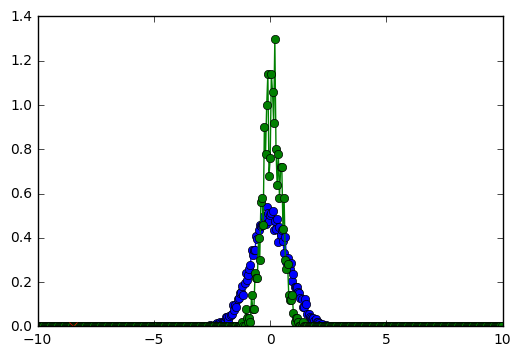

In [477]:
## get the values of the bins on the npl data
bins=400
op_n,op_bins = np.histogram(op,bins=bins,density=True,range=(-10,10))
npl_n,npl_bins = np.histogram(npl,bins=bins,density=True,range=(-10,10))

plt.plot(op_bins[0:-1],op_n,marker='o')
plt.plot(npl_bins[0:-1],npl_n,marker='o')
plt.plot(npl_bins[30],npl_n[30],marker='x')## mark the 11th data point
#plt.xlim(-10,10)
plt.show()

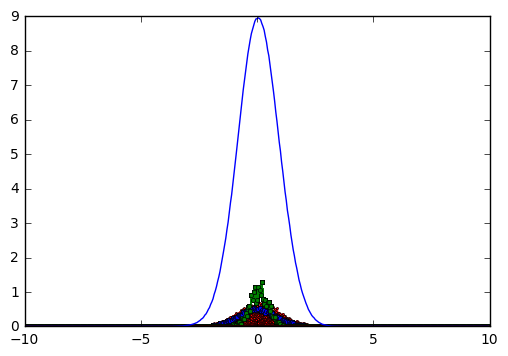

In [478]:
## then scale the op dist by the amplitude at that point in the npl dist

## convert the raw data into points on a histrogram
binrange=(-10,10)
op_n,op_bins = np.histogram(op,bins=bins,density=True,range=binrange)
npl_n,npl_bins = np.histogram(npl,bins=bins,density=True,range=binrange)

total_n = [] # start with empty array of the same length to store the n values

for i in range(len(npl_n)): # loop through each point
    ## find the npl amplitude at that point
    npl_amp = npl_n[i]

    ## find the npl mean at that point
    npl_mean = npl_bins[i]

    ## shift by the mean fo the point of interest
    ##copy the op_bins and shift by the mean at that npl point
    new_op_bins = op_bins+npl_mean
    
    ## use a copy of the op which is shifted to calc the hist points - scaling of amplitude must happen after
    op_copy = op+npl_mean
    
    op_copy_n,op_copy_bins = np.histogram(op_copy,bins=bins,density=True,range=binrange)
    op_copy_n = op_copy_n*npl_amp
    
    
    ##scale the op amplitude at the point of interest
    new_op_n = op_n*npl_amp

    ## plot the orig values
    ms=3
    plt.plot(op_bins[0:-1],op_n,marker='o',c='blue',ms=ms)
    plt.plot(npl_bins[0:-1],npl_n,marker='o',c='green',ms=ms)

    ## plot the new values
    plt.plot(op_copy_bins[0:-1],op_copy_n,marker='o',c='red',ms=ms/2)
    
    ## add each set of values into a single list
    total_n.append(list(op_copy_n))

## sum each bins total to get the overall distribution
tot = np.sum(np.asarray(total_n),axis=0)

## plot the overall distribution
plt.plot(op_copy_bins[0:-1],tot)
#plt.xlim(1,5)
#plt.ylim(0,0.05)
plt.show()

NPL
mean =  0.1
sd =  0.4
OP
mean =  0.01
sd =  0.8
Final
mean =  0.05
sd =  0.94
sd_quad =  0.89


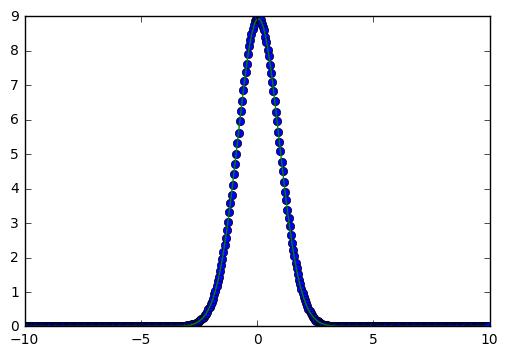

In [479]:
x = op_copy_bins[0:-1]
y = tot

hist = y
bin_centres = x

# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [1., 0., 1.]

coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)

# Get the fitted curve
hist_fit = gauss(bin_centres, *coeff)

plt.plot(bin_centres, hist, label='Test data', marker='o', ls='')
plt.plot(bin_centres, hist_fit, label='Fitted data')

# Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
print('NPL')
print('mean = ', input_npl_mean)
print('sd = ', input_npl_sd)
print('OP')
print('mean = ', input_op_mean)
print('sd = ', input_op_sd)
print('Final')
print('mean = ', round(coeff[1],2))
print('sd = ', round(np.sqrt(coeff[2]),2))
print('sd_quad = ', round(np.sqrt(input_npl_sd**2 + input_op_sd**2),2))

plt.show()

### Adding together independant random variables (i.e.  2 gaussians) works as follows:
- mean(a+b) = mean(a) + mean(b)
- var(a+b) = var(a) + var(b)
    - so sd(a+b) = sqrt(sd(a)^2 + sd(b)^2)

This is different to the values calcualted above, but it is highly likely I have made a mistage in my steps in producing the above combined values.

op 0.01 0.8
npl 0.1 0.4
both 0.11 0.89


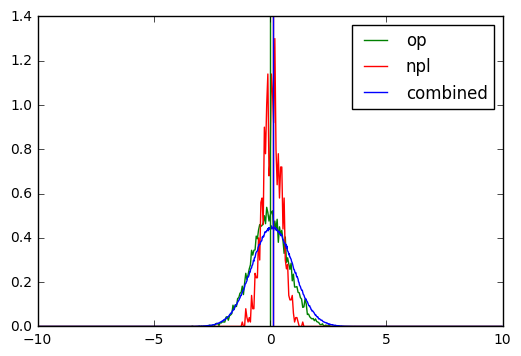

In [480]:
combined_mean = round(input_npl_mean + input_op_mean,2)
combined_sd = round(np.sqrt(input_npl_sd**2 + input_op_sd**2),2)
print('op',input_op_mean,input_op_sd)
print('npl',input_npl_mean,input_npl_sd)
print('both',combined_mean,combined_sd)

tot_norm = np.random.normal(loc=combined_mean,scale=combined_sd,size=1000000)

tot_n, tot_bins = np.histogram(tot_norm,bins=1000,density=True,range=(-10,10))

plt.plot(op_bins[:-1],op_n, label = 'op', c='green')
plt.plot(npl_bins[:-1],npl_n, label = 'npl', c='red')
plt.plot(tot_bins[:-1],tot_n, label = 'combined', c='blue')
plt.axvline(input_op_mean, c='green')
plt.axvline(input_npl_mean, c='red')
plt.axvline(combined_mean, c='blue')
plt.legend(loc='best')
plt.show()

- Combining SDs of 0.4 (NPL) and 0.8 (OPs) gives 0.89 overall. The mean is still basically going to be = 0.
- No real way of doing this on an individual linac bases as that would invovle hvaing measured by NPL within the period of OP data
- If NPL increased to 0.8 then gives 1.13
- so overall variaiton has decreased from 1.13 to 0.89.
    - This is a change of 0.24%